# Import CSV and Project Description

Here, we import the CSV we will be using as well as the necessary Python libraries. 

The goal of this project is to use Age, Sex, Race, Residence County, and an extensive list of other drugs to create a model that predicts whether or not people who died from an overdose in the state of Conneticut had used Cocaine. Note that we are not concluding that the overdose was directly caused by Cocaine, as many of the indivdiduals in this CSV had used a combination of drugs. We also are not predicting whether or not Cocaine users will overdose.

Group Members: Simon Weisser, Yeoman Yoon, Jenny Yin, Samantha Rodriguez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.metrics import jaccard_similarity_score

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

data = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018 (1).csv", header='infer')

# Change values that are 'Unknown' to null
data = (data.replace("Unknown", np.nan))
data

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,07/22/2017 12:00:00 AM,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,Y,NaN,NaN,NaN,NaN,Y,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


# Clean and Feature Engineer the Data

First, we will remove tuples that do not have a ResidenceState of CT. After which, we will remove features that we have deemed as repetitive or unnecessary for the project. We will then explore the data, to understand it better and allow us to decide how we want to handle null values in each attribute, as well as multi-valued attributes

In [2]:
df = pd.DataFrame(data)
new_df = df[df.ResidenceState == 'CT'] # create new Data Frame for rows that have ResidenceState of CT
new_df = new_df.drop(columns=['Date', 'DateType', 'DeathCity', 'DeathCounty', 'Location',
                             'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity',
                             'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Other',
                             'MannerofDeath', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'], axis=1)
new_df

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,Heroin,Cocaine,Fentanyl,...,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
2,16-0165,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
13,15-0232,50.0,Male,White,DANBURY,FAIRFIELD,CT,Y,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
14,16-0028,29.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,Y,NaN,NaN,...,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y
18,16-0065,54.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,Y,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
19,16-0889,32.0,Male,White,WINDHAM,WINDHAM,CT,Y,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,17-0947,28.0,Female,White,MIDDLETOWN,MIDDLESEX,CT,NaN,Y,Y,...,Y,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
5099,15-0013,45.0,Female,White,WATERBURY,NEW HAVEN,CT,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
5100,15-0466,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,NaN,NaN,NaN,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5101,17-0618,21.0,Male,White,MADISON,NEW HAVEN,CT,Y,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#find summary of null values
print(new_df.isnull().sum())

ID                       0
Age                      0
Sex                      4
Race                    22
ResidenceCity            0
ResidenceCounty         42
ResidenceState           0
Heroin                1790
Cocaine               2416
Fentanyl              1498
FentanylAnalogue      3091
Oxycodone             3095
Oxymorphone           3411
Ethanol               2538
Hydrocodone           3376
Benzodiazepine        2447
Methadone             3116
Amphet                3318
Tramad                3348
Morphine_NotHeroin    3404
Hydromorphone         3420
OpiateNOS             3360
AnyOpioid             1138
dtype: int64


In [4]:
print('Sex Summary:')
new_df.groupby('Sex').count()

Sex Summary:


,ID,Age,Race,ResidenceCity,ResidenceCounty,ResidenceState,Heroin,Cocaine,Fentanyl,FentanylAnalogue,...,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
Sex,,,,,,,,,,,,,,,,,,,,,
Female,864,864,858,864,856,864,337,258,389,72,...,200,32,337,106,37,31,16,8,29,568
Male,2574,2574,2558,2574,2540,2574,1314,767,1552,278,...,702,34,657,219,87,62,22,13,53,1733


Given that about 75% of individuals in this data set are Males, we are going to change the null values in the sex column to Male.

In [5]:
new_df['Sex'].fillna('Male', inplace=True) # change null value
print(new_df['Sex'].isnull().sum()) # make sure there are no longer and null values

0


Next, we will deal with the null values of Race in a similar manner to Sex. We will find the mode of the Race column and set all the null values equal to this.

In [6]:
print('Race Summary:')
new_df.groupby('Race').count()

Race Summary:


,ID,Age,Sex,ResidenceCity,ResidenceCounty,ResidenceState,Heroin,Cocaine,Fentanyl,FentanylAnalogue,...,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
Race,,,,,,,,,,,,,,,,,,,,,
Asian Indian,13,13,13,13,13,13,6,5,10,3,...,5,1,2,0,1,1,0,0,0,6
"Asian, Other",12,12,12,12,12,12,7,5,5,1,...,3,0,4,0,1,2,0,0,0,8
Black,300,300,300,300,295,300,121,154,160,38,...,98,2,35,20,6,10,1,1,2,179
Chinese,2,2,2,2,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,2
Hawaiian,1,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
"Hispanic, Black",17,17,17,17,17,17,7,5,13,2,...,4,0,1,0,0,0,0,0,1,10
"Hispanic, White",379,379,379,379,374,379,201,125,221,43,...,80,5,72,34,6,7,0,0,10,258
Other,6,6,6,6,6,6,2,4,4,1,...,2,0,0,0,0,1,0,0,0,4
White,2690,2690,2690,2690,2658,2690,1295,721,1518,261,...,708,58,874,269,110,73,37,21,68,1819


The race White make up about 78% of the individuals in this data set. Therefore, we will set all null values to the race White.

In [7]:
new_df['Race'].fillna('White', inplace=True)
print(new_df['Race'].isnull().sum())

0


Here, we categorize the races Asian Indian, Chinese, and Hawaiian into Asian.

In [8]:
new_df['Race'].replace({'Asian Indian':'Asian', 'Chinese':'Asian', 'Hawaiian':'Asian'}, inplace=True)
new_df.groupby('Race').count()

,ID,Age,Sex,ResidenceCity,ResidenceCounty,ResidenceState,Heroin,Cocaine,Fentanyl,FentanylAnalogue,...,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
Race,,,,,,,,,,,,,,,,,,,,,
Asian,16,16,16,16,16,16,8,5,10,3,...,5,1,4,0,1,1,0,0,1,9
"Asian, Other",12,12,12,12,12,12,7,5,5,1,...,3,0,4,0,1,2,0,0,0,8
Black,300,300,300,300,295,300,121,154,160,38,...,98,2,35,20,6,10,1,1,2,179
"Hispanic, Black",17,17,17,17,17,17,7,5,13,2,...,4,0,1,0,0,0,0,0,1,10
"Hispanic, White",379,379,379,379,374,379,201,125,221,43,...,80,5,72,34,6,7,0,0,10,258
Other,6,6,6,6,6,6,2,4,4,1,...,2,0,0,0,0,1,0,0,0,4
White,2712,2712,2712,2712,2680,2712,1306,728,1531,263,...,712,58,879,272,110,73,37,21,68,1836


Now we will change all null values for all the drug attributes. First we will insert the value No into null columns. After which, we will convert the string data to binary (0 for Yes, 1 for No) so that we can later use it to run determine correlations. 

In [9]:
columns = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
      'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 
      'Amphet', 'Tramad', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid', 'Morphine_NotHeroin']

for drug in columns: # update Null values of Drug columns
    new_df[drug].fillna('N', inplace=True)

# update all values so data has numeric values
for index, row in new_df.iterrows():
    for drug in columns:
        if (row[drug] == 'Y'):
            new_df.at[index, drug] = 1
        if (row[drug] == 'N'):
            new_df.at[index, drug] = 0
            
        if (row[drug] == 'Y-A'):
            new_df.at[index, drug] = 1
        if (row[drug] == 'Y POPS'):
            new_df.at[index, drug] = 1
        if (row[drug] == 'Y (PTCH)'):
            new_df.at[index, drug] = 1
        if (row[drug] == 'YES'):
            new_df.at[index, drug] = 1
        if (row[drug] == 'STOLE MEDS'):
            new_df.at[index, drug] = 1
        
        if (row[drug] == 'NO RX BUT STRAWS'):
            new_df.at[index, drug] = 0
        if (row[drug] == 'PCP NEG'):
            new_df.at[index, drug] = 0

print(new_df.isnull().sum())

ID                     0
Age                    0
Sex                    0
Race                   0
ResidenceCity          0
ResidenceCounty       42
ResidenceState         0
Heroin                 0
Cocaine                0
Fentanyl               0
FentanylAnalogue       0
Oxycodone              0
Oxymorphone            0
Ethanol                0
Hydrocodone            0
Benzodiazepine         0
Methadone              0
Amphet                 0
Tramad                 0
Morphine_NotHeroin     0
Hydromorphone          0
OpiateNOS              0
AnyOpioid              0
dtype: int64


The only attribute with null values is ResidenceCounty. We will print the ResidenceCity of rows whose ResidenceCounty is null. Then we will manually determine what county that city is in and insert it. Afterwards, we will remove ResidenceCity and ResidenceState (since we are only considering ResidenceCounty) and be left with our final Data Frame.

In [10]:
new_df2 = new_df # create new DataFrame as a checkpoint

# here we are going to print out the ResidenceCity of all individuals who have a null
# ResidenceCounty so we can determine their ResidenceCounty
for index, row in new_df2.iterrows():
    if (pd.isnull(row['ResidenceCounty'])):
        print(row['ResidenceCity'])
print()
        
middlesex = ['EAST HAMPTON', 'DURHAM']
fairfield = ['BRIDGEPORT', 'STRATFORD', 'NORWALK', 'FAIRFIELD']
new_haven = ['OXFORD', 'NEW HAVEN', 'WATERBURY', 'MIDDLEBURY', 'HAMDEN', 'MERIDEN', 'WEST HAVEN', 'NAUGATUCK']
hartford = ['NEW BRITAIN', 'HARTFORD', 'SOUTH WINDSOR', 'BRISTOL', 'GLASTONBURY']
new_london = ['NORTH STONINGTON', 'MONTVILLE', 'GROTON']
windham = ['STERLING', 'ASHFORD']
litchfield = ['TORRINGTON', 'TERRYVILLE', 'NEW HARTFORD']
tolland = ['SOMERS', 'COVENTRY']

# update the value in the DataFrame
for index, row in new_df2.iterrows():
    if (pd.isnull(row['ResidenceCounty'])):
        if row['ResidenceCity'] in middlesex:
            new_df2.at[index, 'ResidenceCounty'] = 'MIDDLESEX'
        if row['ResidenceCity'] in fairfield:
            new_df2.at[index, 'ResidenceCounty'] = 'FAIRFIELD'
        if row['ResidenceCity'] in new_haven:
            new_df2.at[index, 'ResidenceCounty'] = 'NEW HAVEN'
        if row['ResidenceCity'] in hartford:
            new_df2.at[index, 'ResidenceCounty'] = 'HARTFORD'
        if row['ResidenceCity'] in new_london:
            new_df2.at[index, 'ResidenceCounty'] = 'NEW LONDON'
        if row['ResidenceCity'] in windham:
            new_df2.at[index, 'ResidenceCounty'] = 'WINDHAM'
        if row['ResidenceCity'] in litchfield:
            new_df2.at[index, 'ResidenceCounty'] = 'LITCHFIELD'
        if row['ResidenceCity'] in tolland:
            new_df2.at[index, 'ResidenceCounty'] = 'TOLLAND'

print(new_df2.isnull().sum()) # there should be no more Null values in any column

new_df2.groupby('ResidenceCounty').count()

# drop ResidenceCity and ResidenceState as it is no longer needed
overdose_df = new_df2.drop(columns=['ResidenceCity', 'ResidenceState'], axis = 1)
print()
print(overdose_df.head())

EAST HAMPTON
BRIDGEPORT
OXFORD
NEW HAVEN
NEW BRITAIN
HARTFORD
NEW HAVEN
WATERBURY
NEW HAVEN
MIDDLEBURY
HAMDEN
NEW HAVEN
SOUTH WINDSOR
NORTH STONINGTON
STERLING
STRATFORD
BRIDGEPORT
WATERBURY
MERIDEN
WATERBURY
BRISTOL
DURHAM
SOMERS
HARTFORD
ASHFORD
HARTFORD
NORWALK
COVENTRY
WATERBURY
TORRINGTON
TERRYVILLE
GLASTONBURY
MONTVILLE
STRATFORD
FAIRFIELD
MONTVILLE
STRATFORD
WATERBURY
WEST HAVEN
GROTON
NEW HARTFORD
NAUGATUCK

ID                    0
Age                   0
Sex                   0
Race                  0
ResidenceCity         0
ResidenceCounty       0
ResidenceState        0
Heroin                0
Cocaine               0
Fentanyl              0
FentanylAnalogue      0
Oxycodone             0
Oxymorphone           0
Ethanol               0
Hydrocodone           0
Benzodiazepine        0
Methadone             0
Amphet                0
Tramad                0
Morphine_NotHeroin    0
Hydromorphone         0
OpiateNOS             0
AnyOpioid             0
dtype: int64

         ID   

# Explore the Data

First we will explore the age of individuals who overdosed with cocoaine in their system. Below is a histogram that gives a visualization of this.

(array([ 5., 23., 30., 60., 43., 54., 57., 95., 52., 73., 55., 86., 85.,
        58., 85., 49., 54., 25., 23.,  4.,  7.,  3.]),
 array([17.        , 19.54545455, 22.09090909, 24.63636364, 27.18181818,
        29.72727273, 32.27272727, 34.81818182, 37.36363636, 39.90909091,
        42.45454545, 45.        , 47.54545455, 50.09090909, 52.63636364,
        55.18181818, 57.72727273, 60.27272727, 62.81818182, 65.36363636,
        67.90909091, 70.45454545, 73.        ]),
 <a list of 22 Patch objects>)

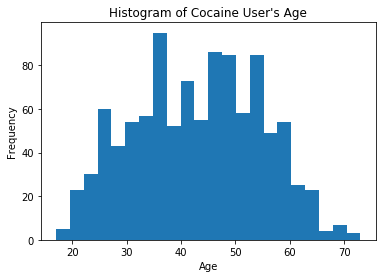

In [11]:
# Create a Histogram
df_age = overdose_df[overdose_df['Cocaine']==1]
plt.title("Histogram of Cocaine User's Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df_age['Age'], bins=22)

An interest conclusion from this histogram is how old many of the individuals are. We were assuming that there would be a very large spike for people in their late 20's or early 30's. While the mode of this data is in the mid 30's, there are still very large spikes for people in their late 40's and mid 50's. Even more surpsingy is that there are individuals who are over the age of 60 that overdosed.

____
Below is a bar graph that shows the frequency of individuals who overdosed with cocaine in their system based on their county based on the individuals in that county that overdosed. It was important to find the frequency of cocaine users in each county based on the total number of overdoses in each county because the counties with more people (Hartford, New Haven, ect.) would have a much higher count than the other counties. The bar graph does show that there is some variation of usage between counties, as there is a range of around 0.08.

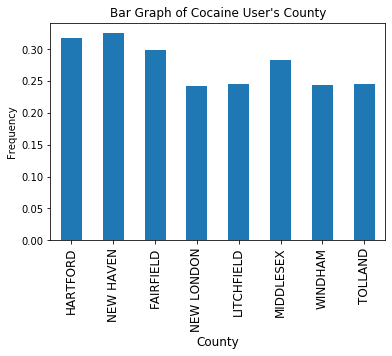

In [12]:
df_cocaine = overdose_df[overdose_df['Cocaine']==1] # new DataFrame for users who all used Cocaine

# Create a Bar Graph
plt.title("Bar Graph of Cocaine User's County")
plt.xlabel('County', fontsize=12)
plt.xticks(rotation = 55, fontsize=12)
plt.ylabel('Frequency')
(df_cocaine['ResidenceCounty'].value_counts()/overdose_df['ResidenceCounty'].value_counts()).plot(kind='bar')

The bar graph below uses the same idea as the graph above to show Cocaine users based on their Race. There does seem to be some vairation based on Race.

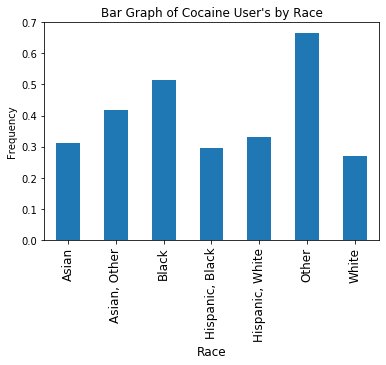

In [13]:
# Create a Bar Graph
plt.title("Bar Graph of Cocaine User's by Race")
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation = 55, fontsize=12)
plt.ylabel('Frequency')
(df_cocaine['Race'].value_counts()/overdose_df['Race'].value_counts()).plot(kind='bar')

Below is a bar graph that shows the frequency of overdoses in which cocaine is in the system to all overdoses for both male and females. The idea is to compare the cocaine usage in this data set for both sexes. The bar graph shows that there is essentially no difference, and that cocaine usage is the same amongst both sexes for individuals that overdosed.

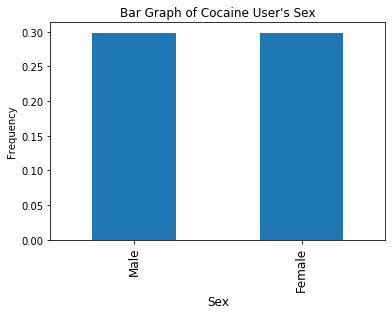

In [14]:
# Create a Bar Graph
plt.title("Bar Graph of Cocaine User's Sex")
plt.xlabel('Sex', fontsize=12)
plt.xticks(rotation = 55, fontsize=12)
plt.ylabel('Frequency')
(df_cocaine['Sex'].value_counts()/overdose_df['Sex'].value_counts()).plot(kind='bar')

Next we will show the correlation between usage of cocaine in relation to each of the other drugs listed. We will use the jaccard_similarity_score method, which will determine what fraction of the two columns being compared in the for loop have identical values (0 for No, 1 for Yes).

In [15]:
from sklearn.metrics import jaccard_similarity_score
attributes = ['Heroin', 'Fentanyl','FentanylAnalogue', 'Oxycodone',
      'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 
      'Amphet', 'Tramad', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid', 'Morphine_NotHeroin']

# Find correlation for each drug and Cocaine
for i in attributes:
    print()
    print('Correlation between', str(i), 'and Cocaine')
    print(jaccard_similarity_score(overdose_df['Cocaine'].astype('float64'), overdose_df[i].astype('float64')))


Correlation between Heroin and Cocaine
0.5130737943056363

Correlation between Fentanyl and Cocaine
0.48576409064497383

Correlation between FentanylAnalogue and Cocaine
0.6719930273097037

Correlation between Oxycodone and Cocaine
0.6342242882045322

Correlation between Oxymorphone and Cocaine
0.6940732132481116

Correlation between Ethanol and Cocaine
0.5793143521208599

Correlation between Hydrocodone and Cocaine
0.6885531667635096

Correlation between Benzodiazepine and Cocaine
0.5453224869262057

Correlation between Methadone and Cocaine
0.6507844276583382

Correlation between Amphet and Cocaine
0.6885531667635096

Correlation between Tramad and Cocaine
0.6868099941894248

Correlation between Hydromorphone and Cocaine
0.6972690296339338

Correlation between OpiateNOS and Cocaine
0.6815804764671702

Correlation between AnyOpioid and Cocaine
0.3916327716443928

Correlation between Morphine_NotHeroin and Cocaine
0.6932016269610691


To get a better understanding of the correlation, below we will display the percent of individuals that used each drug listed along with Cocaine, given we know that the individual used Cocaine. 

In [27]:
attributes = ['Heroin', 'Fentanyl','FentanylAnalogue', 'Oxycodone',
      'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
      'Amphet', 'Tramad', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid', 'Morphine_NotHeroin']

print(str(df_cocaine.shape[0])+ ' people used Cocaine.') # Total number of Cocaine Users

for i in attributes:
    print()
    # divide total users of Cocaine and another drug by total Cocaine users for each drug
    num = (df_cocaine[df_cocaine[i] == 1].shape[0])/(df_cocaine.shape[0])*100
    print(str(num) + '% of people who used Cocaine also used ' + str(i))

1026 people used Cocaine.

48.83040935672515% of people who used Cocaine also used Heroin

58.47953216374269% of people who used Cocaine also used Fentanyl

12.085769980506821% of people who used Cocaine also used FentanylAnalogue

5.555555555555555% of people who used Cocaine also used Oxycodone

0.1949317738791423% of people who used Cocaine also used Oxymorphone

23.489278752436647% of people who used Cocaine also used Ethanol

0.9746588693957114% of people who used Cocaine also used Hydrocodone

22.22222222222222% of people who used Cocaine also used Benzodiazepine

7.309941520467836% of people who used Cocaine also used Methadone

3.8011695906432745% of people who used Cocaine also used Amphet

2.046783625730994% of people who used Cocaine also used Tramad

0.29239766081871343% of people who used Cocaine also used Hydromorphone

0.5847953216374269% of people who used Cocaine also used OpiateNOS

60.03898635477582% of people who used Cocaine also used AnyOpioid

0.29239766081871343

We will now check the reverse of the previous column. That is, we will check what percent of individuals used Cocaine with each drug, given we know that they used the drug we are interested in (not Cocaine). 

In [ ]:
attributes = ['Heroin', 'Fentanyl','FentanylAnalogue', 'Oxycodone',
      'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
      'Amphet', 'Tramad', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid', 'Morphine_NotHeroin']

for i in attributes:
    drug_df = overdose_df[overdose_df[i]==1] # print total number of users for drug
   
    # divide total Cocaine users and users of another drug by total users of that other drug
    num = (drug_df[drug_df['Cocaine'] == 1].shape[0])/(drug_df.shape[0])*100
    print(str(drug_df.shape[0]) + ' used ' + str(i))
    print(str(num) + '% of people who used '+ str(i)+' also used Cocaine')
    print() 

Before we get to the algorithms, we will use One Hot Encoding so that the algorithms can handle the Categorical columns we have (ResidenceCounty, Sex, Race).

In [16]:
overdose_df_Y = overdose_df['Cocaine'] # label
overdose_df_X = overdose_df.drop(['ID', 'Cocaine'], axis = 1) # Features
print (overdose_df_Y.shape) # shape of Label
print (overdose_df_X.shape) # shape of Features
overdose_df_X.head() # head of the features DataFrame

(3442,)
(3442, 19)


,Age,Sex,Race,ResidenceCounty,Heroin,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
2,30.0,Female,White,FAIRFIELD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,50.0,Male,White,FAIRFIELD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,29.0,Male,Black,NEW HAVEN,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
18,54.0,Male,White,MIDDLESEX,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
19,32.0,Male,White,WINDHAM,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [17]:
# One hot encoding to handle categorical data
data_X = pd.get_dummies(overdose_df_X, columns=['Sex', 'Race', 'ResidenceCounty'])
data_Y = overdose_df_Y.astype('int64', copy=False) # set class label to numeric
data_X =data_X.astype('int64', copy=False) # set all features to numeric
data_X.info() # print information about each feature
print(data_X.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442 entries, 2 to 5104
Data columns (total 33 columns):
Age                           3442 non-null int64
Heroin                        3442 non-null int64
Fentanyl                      3442 non-null int64
FentanylAnalogue              3442 non-null int64
Oxycodone                     3442 non-null int64
Oxymorphone                   3442 non-null int64
Ethanol                       3442 non-null int64
Hydrocodone                   3442 non-null int64
Benzodiazepine                3442 non-null int64
Methadone                     3442 non-null int64
Amphet                        3442 non-null int64
Tramad                        3442 non-null int64
Morphine_NotHeroin            3442 non-null int64
Hydromorphone                 3442 non-null int64
OpiateNOS                     3442 non-null int64
AnyOpioid                     3442 non-null int64
Sex_Female                    3442 non-null int64
Sex_Male                      3442 non-null

# SVC Method

In [18]:
scaler = StandardScaler()
svc = SVC()

# create a Piepeline
pipe = Pipeline([('scaler', scaler),('svc', svc)])

scores = cross_val_score(pipe, data_X, data_Y, cv=5)
print("Mean Scores", scores.mean())

Mean Scores 0.7202190765082574


In [19]:
# tune the 'kernel' hyperparameter
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_search = GSCV(pipe,param_grid, cv=5)
grid_search.fit(data_X, data_Y)
print(grid_search.best_params_)

{'svc__kernel': 'rbf'}


In [20]:
# nested cross-validation
 
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)

print("Accuracy:", nested_score.mean())

Accuracy: 0.7202190765082574


# KNN Model

In [21]:
# create a scaler
scaler = MinMaxScaler()

# create a PCA
pca = PCA()

# create a KNN classifier
knn = KNeighborsClassifier()

# create a pipeline that does scaling, then PCA, then KNN
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', knn)])

# set up the parameters you want to tune for each of your pipeline steps
param_grid = {
    'pca__n_components': list(range(1, 33)), #find how many principal componenet to keep
    'knn__n_neighbors': list(range(1, 30)),  #find the best value of k
}

# pass the pipeline and the parameters into a GridSearchCV with a 5-fold cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# call fit() on the GridSearchCV and pass in the unscaled data (X_values, Y_values)
grid_search.fit(data_X, data_Y)

# print out the best_score_ and best_params_ from the GridSearchCV
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7141196978500871
{'knn__n_neighbors': 27, 'pca__n_components': 24}


In [22]:
# nested cross-validation
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)

# displays accuracy of model
print("Accuracy:", nested_score.mean()*100)

Accuracy: 70.74401752612067


# Ensemble Method

In [23]:
ens = RandomForestClassifier() 
param_grid_ens = {
    'max_depth': list(range(35,56)), # use _ _ when using pipeline *IMPORTANT*
    'min_samples_leaf': [8, 10, 12],
    'max_features': ["sqrt", "log2"]
}
data_ens = GridSearchCV(ens, param_grid = param_grid_ens, cv=5)
data_ens.fit(data_X, data_Y)
print("Accuracy:", grid_search.best_params_)

data_ens_cvs = cross_val_score(data_ens, data_X, data_Y, cv=5, scoring = 'accuracy')
print(data_ens_cvs.mean()*100)

Accuracy: {'knn__n_neighbors': 27, 'pca__n_components': 24}
71.67340748230535


In [24]:
from sklearn.ensemble import AdaBoostClassifier as ABC
abc = ABC()
param_grid = {'n_estimators':[i for i in range(50,275,25)]}
grid_search = GSCV(abc,param_grid,cv=5)
grid_search.fit(data_X,data_Y)
print(grid_search.best_params_)

nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)
print("Accuracy:", nested_score.mean())

{'n_estimators': 75}
Accuracy: 0.7053993933265925


# Naive Bayes Method

In [25]:
# create GaussianNB classifier
clf = GaussianNB()
clf = clf.fit(data_X, data_Y)

# perform 10-fold cross validation on classifier
scores = cross_val_score(clf, data_X, data_Y, cv=10)

# display accuracy
print("Accuracy:", scores.mean()*100)

Accuracy: 47.24519372966577


In [26]:
# find predicted y values using cross_val_predict
pred_Y = cross_val_predict(clf, data_X, data_Y, cv=10)

# show the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(data_Y, pred_Y))

# show the classification report
print("\nClassification Report:\n", classification_report(data_Y, pred_Y))

Confusion Matrix:
 [[ 840 1576]
 [ 240  786]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.35      0.48      2416
           1       0.33      0.77      0.46      1026

    accuracy                           0.47      3442
   macro avg       0.56      0.56      0.47      3442
weighted avg       0.65      0.47      0.48      3442



# Conclusion:
From our analysis using different machine learning techniques, we found that the accuracy of our model for predicting Cocaine usage amongst those who have overdosed on drugs in Connecticut is around 71%. We found similar accuracy scores using the KNN, SVC, and Ensemble methods but found a significantly lower score using the Naive Bayes method (50%). This lower score is likely due to the nature of our dataset in having a good portion of categorical features. Ultimately, due to the similar accuracy scores of most of our methods, we can have confidence in the validity of our results.